In [128]:
import glob, os
import pandas as pd 
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt

from nilearn.plotting import plot_anat, show, plot_roi
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img


import nibabel
import nibabel.processing
from nibabel.funcs import squeeze_image

In [135]:
epi_voxel_size = 2 # 2x2x2 mm (scalar = isotropic voxel)
cut_coords = (3,4,23)

In [89]:
brain_mask_fn = ('/lab_data/coaxlab/Projects/loki_1/skull_stripped_T1/brain_masks/*mask*')
brain_mask_files = glob.glob(brain_mask_fn)
brain_mask_files.sort()

t1_fn = ('/lab_data/coaxlab/Projects/loki_1/anatomicals/sub*/anat/*_defaced_T1w.nii.gz')
t1_files = glob.glob(t1_fn)
t1_files.sort()

skull_stripped_t1_path = ('/lab_data/coaxlab/Projects/loki_1/skull_stripped_T1/')
resampled_t1_path = ('/lab_data/coaxlab/Projects/loki_1/downsampled_T1')

# Skull strip 

790
report generated


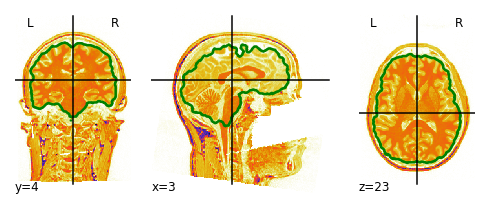

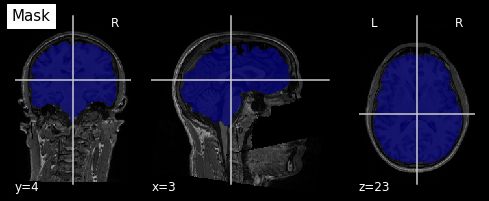

811
report generated


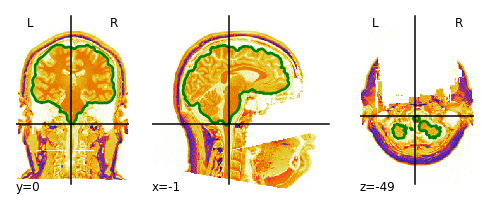

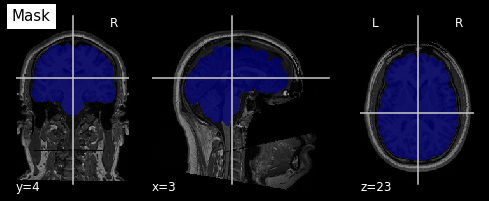

813
report generated


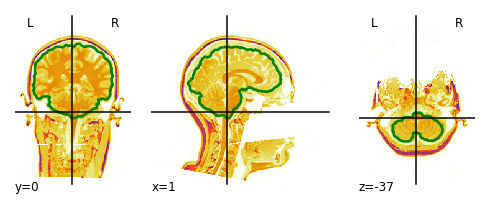

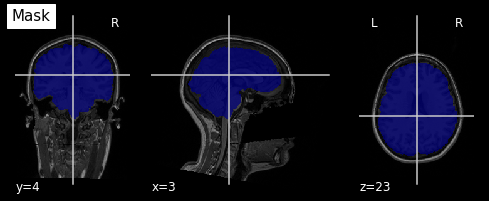

860
report generated


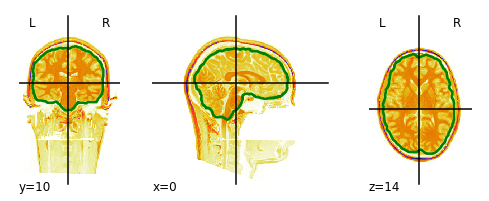

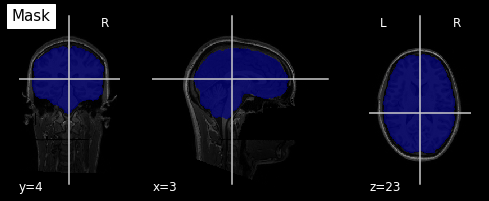

In [137]:
for t1 in t1_files:
    
    sub = t1.split('sub-')[1][:3]
    print(sub)
    
    brain_mask = list(filter(lambda x: str(sub) in x, brain_mask_files))[0]
    unmasked_t1 = list(filter(lambda x: str(sub) in x, t1_files))[0]

    nii_masker = NiftiMasker(mask_img=brain_mask, memory="nilearn_cache",
                     memory_level=20, reports=1)

    
    nii_masker.fit(unmasked_t1)
    mask_img = nii_masker.mask_img_

    report = nii_masker.generate_report()
    print('report generated')

    plot_roi(mask_img, unmasked_t1, display_mode='ortho', cut_coords=cut_coords, title="Mask")
    show()

    masked_t1_fn = os.path.basename(t1).split('.nii.gz')[0] + ('_skull_stripped')

    
    t1_masked_2d = nii_masker.transform(unmasked_t1)
    np.save(os.path.join(skull_stripped_t1_path, 'skull_stripped_2d', masked_t1_fn + '_2d.npy'), t1_masked_2d)
    print('masked t1 saved as 2D matrix')
  
    t1_masked_brain_space = nii_masker.inverse_transform(t1_masked_2d)
    t1_masked_brain_space.to_filename(os.path.join(skull_stripped_t1_path, 'skull_stripped_brain_space', masked_t1_fn + '_brain.nii.gz'))
    print('masked t1 saved in brain space')

In [102]:
t1_skull_stripped_fn = (os.path.join(skull_stripped_t1_path, 'skull_stripped_brain_space', '*_skull_stripped_brain.nii.gz'))
t1_skull_stripped_files = glob.glob(t1_skull_stripped_fn)
t1_skull_stripped_files.sort()

original


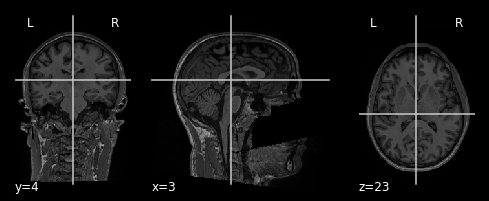

skull-stripped version


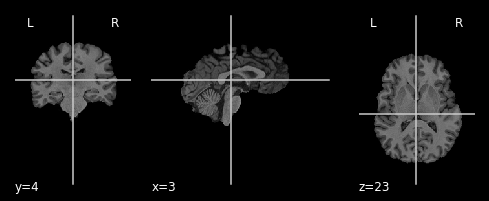

original


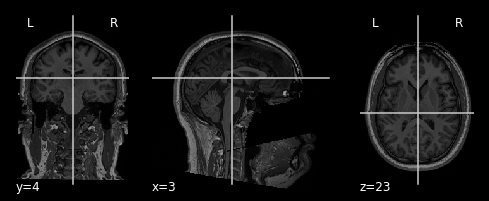

skull-stripped version


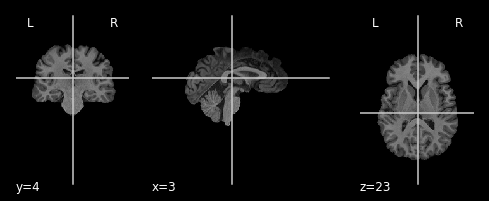

original


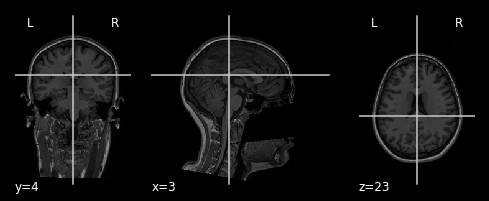

skull-stripped version


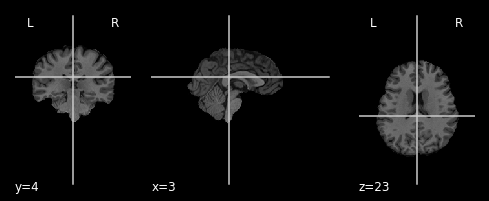

original


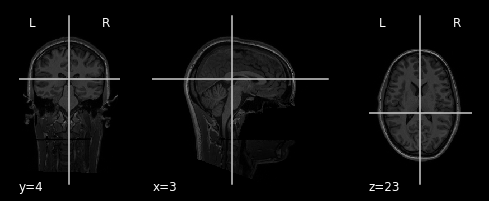

skull-stripped version


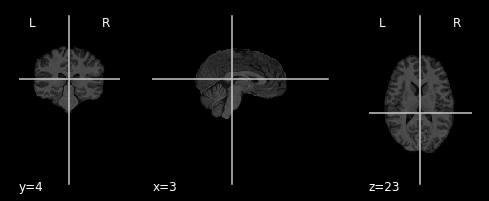

In [123]:
for t1, t1_ss in zip(t1_files, t1_skull_stripped_files):
    print('original')
    plot_anat(anat_img=t1, cut_coords=cut_coords)
    show()
    print('skull-stripped version')
    plot_anat(anat_img=t1_ss, cut_coords=cut_coords)
    show()

# Resample the T1 image to EPI (BOLD) resolution (2x2x2-mm voxels)

In [130]:
for t1 in t1_skull_stripped_files: 

    original_t1 = squeeze_image(nibabel.load(t1))  # inverse transform adds an extra axis of size 1
    resampled_t1 = nibabel.processing.resample_to_output(original_t1, voxel_sizes=epi_voxel_size)
    
    resampled_fn = os.path.basename(t1).split('.nii.gz')[0] + ('_resampled_{}^3.nii.gz').format(epi_voxel_size)
    
    nibabel.save(resampled_t1, os.path.join(resampled_t1_path, 'skull_stripped', resampled_fn))

# Check resampled images

In [131]:
resampled_t1_fn = ('/lab_data/coaxlab/Projects/loki_1/downsampled_T1/skull_stripped/*resampled*')
resampled_t1_files = glob.glob(resampled_t1_fn)

original


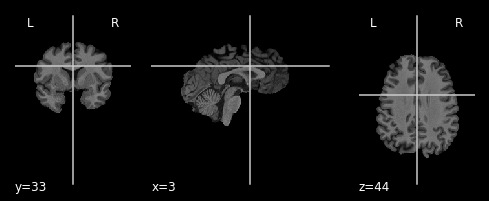

resampled version


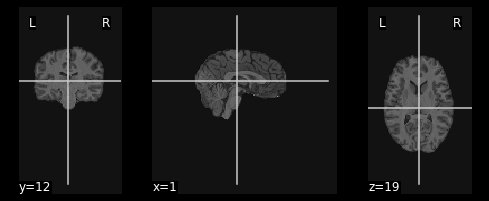

original


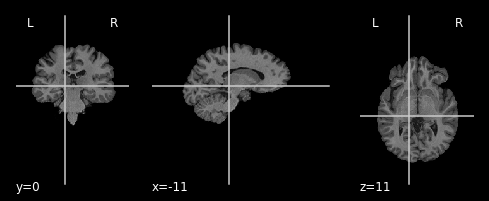

resampled version


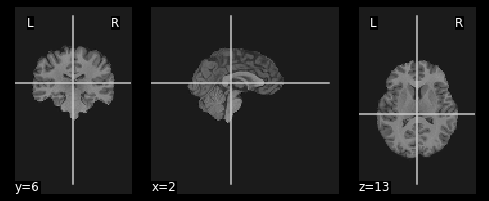

original


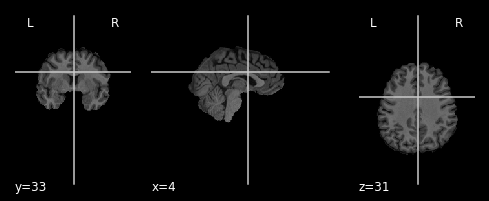

resampled version


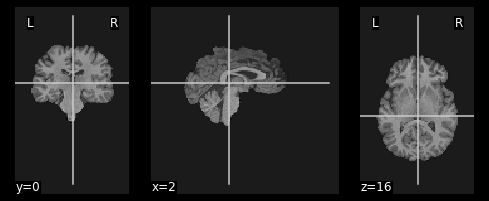

original


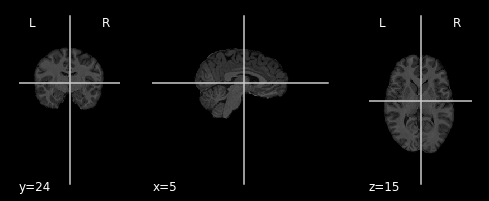

resampled version


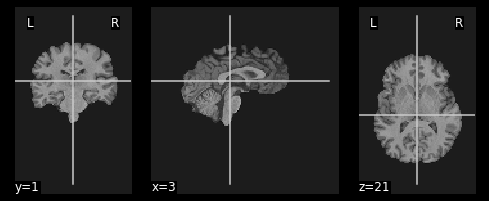

In [134]:
for t1_ss, re_t1 in zip(t1_skull_stripped_files, resampled_t1_files):
    print('original')
    plot_anat(t1_ss)  
    show()
    print('resampled version')
    plot_anat(re_t1)
    show()